## Women's E-commerce data

In [2]:
#Required packages
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline
import os     

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
#import pydotplus

import warnings
warnings.filterwarnings('ignore')

import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
# from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

Populating the interactive namespace from numpy and matplotlib


### About Dataset

This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:
<ul>
    <li>Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.</li>
    <li>Age: Positive Integer variable of the reviewers age.</li>
    <li>Title: String variable for the title of the review.</li>
    <li>Review Text: String variable for the review body.</li>
    <li>Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.</li>
    <li>Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.</li>
    <li>Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.</li>
    <li>Division Name: Categorical name of the product high level division.</li>
    <li>Department Name: Categorical name of the product department name.</li>
    <li>Class Name: Categorical name of the product class name.</li>
</ul>

In [3]:
#Reading the data & renaming the columns
df = pd.read_csv('C:/data/Womens Clothing E-Commerce Reviews.csv',index_col=0)
df.columns=['clothing_ID',
            'age',
            'review_title',
            'review_text',
            'rating',
            'recommended_IND',
            'positive_feedback_count',
            'division_name',
            'dept_name',
            'class_name'
           ]
df.head(10)

,clothing_ID,age,review_title,review_text,rating,recommended_IND,positive_feedback_count,division_name,dept_name,class_name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


##### Data Cleaning

In [4]:
df.isna().sum()

clothing_ID                   0
age                           0
review_title               3810
review_text                 845
rating                        0
recommended_IND               0
positive_feedback_count       0
division_name                14
dept_name                    14
class_name                   14
dtype: int64

Removing columns that are not being used.

In [5]:
df.drop('review_title', axis = 1,inplace = True)

Removing the rows with na values

In [6]:
df.dropna(how = 'any', subset = ['dept_name'], inplace = True)

##### Exploring Dataset

In [7]:
df.describe()

,clothing_ID,age,rating,recommended_IND,positive_feedback_count
count,23472.000000,23472.000000,23472.000000,23472.000000,23472.000000
mean,918.486665,43.200707,4.195552,0.822256,2.537151
std,202.727678,12.280913,1.110188,0.382305,5.703597
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [8]:
df.corr()

,clothing_ID,age,rating,recommended_IND,positive_feedback_count
clothing_ID,1.000000,0.017322,-0.017626,-0.015414,0.045875
age,0.017322,1.000000,0.026967,0.030712,0.043049
rating,-0.017626,0.026967,1.000000,0.792311,-0.064820
recommended_IND,-0.015414,0.030712,0.792311,1.000000,-0.068954
positive_feedback_count,0.045875,0.043049,-0.064820,-0.068954,1.000000


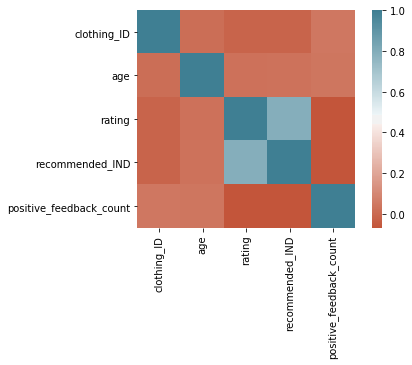

In [9]:
sns.heatmap(df.corr() , cmap=sns.diverging_palette(20, 220, n=256) , square=True)

##### Univariate Analysis

Text(0,0.5,'Density Percent')

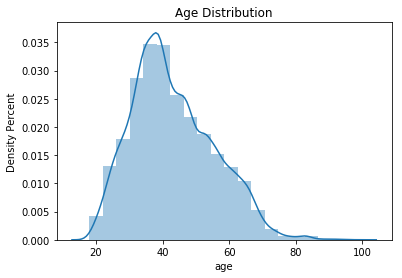

In [10]:
fig, ax = plt.subplots(1,figsize=(6, 4))   # figure and axes .
sns.distplot(df.age, bins = 20)
ax.set_title('Age Distribution')
ax.set_ylabel('Density Percent')

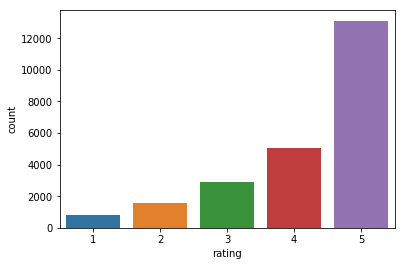

In [43]:
sns.countplot(df.rating)

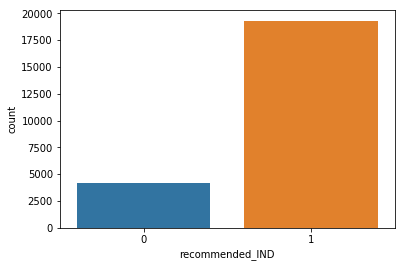

In [44]:
sns.countplot(df.recommended_IND)

##### Bivariate Analysis

In [45]:
Total_feedbck_count = df.groupby(['clothing_ID','age'], as_index = False).\
                                    agg({'positive_feedback_count': 'sum'}) 

In [46]:
Total_feedbck_count.sort_values(by = ['clothing_ID','positive_feedback_count'], ascending = False)

,clothing_ID,age,positive_feedback_count
8786,1205,34,0
8787,1205,69,0
8785,1204,39,3
8783,1203,53,1
8784,1203,54,1
8776,1203,27,0
8777,1203,29,0
8778,1203,30,0
8779,1203,34,0
8780,1203,37,0


In [47]:
Total_feedbck_count[Total_feedbck_count.clothing_ID == 1078].\
           sort_values(by = ['clothing_ID','positive_feedback_count'], ascending = False)

,clothing_ID,age,positive_feedback_count
7279,1078,39,217
7286,1078,46,170
7263,1078,23,133
7276,1078,36,123
7292,1078,52,110
7274,1078,34,102
7293,1078,53,101
7275,1078,35,100
7284,1078,44,99
7267,1078,27,85


In [48]:
Total_feedbck_count.sort_values(by = ['clothing_ID','positive_feedback_count'], ascending = False).\
                                nlargest(10,'positive_feedback_count')

,clothing_ID,age,positive_feedback_count
7279,1078,39,217
7894,1094,39,205
7286,1078,46,170
7891,1094,36,160
7943,1095,29,151
3454,867,56,149
7426,1081,39,146
7263,1078,23,133
3191,862,39,131
7892,1094,37,128


Text(0, 0.5, 'Density Percent')

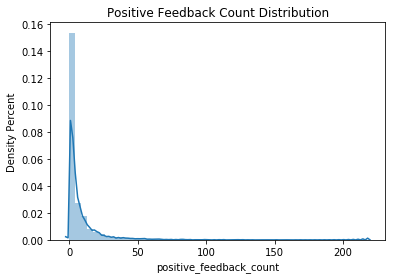

In [54]:
fig, ax = plt.subplots(1,figsize=(6, 4))   # figure and axes .
sns.distplot(Total_feedbck_count.positive_feedback_count)
ax.set_title('Positive Feedback Count Distribution')
ax.set_ylabel('Density Percent')

###### Age Versus Positive Feedback Count.

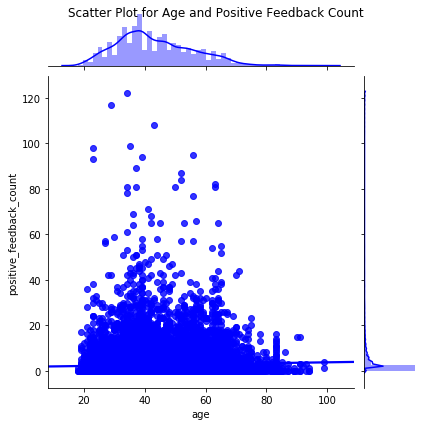

In [55]:
g = sns.jointplot(x=df.age, y=df.positive_feedback_count, kind='reg', color='b')
g.fig.suptitle("Scatter Plot for Age and Positive Feedback Count")
#plt.savefig('positivefeedback-age.png', format='png', dpi=300)
plt.show()

binning Age

In [66]:
df['age_bin'] = pd.cut(df.age , bins = 6)
df.groupby('age_bin').rating.mean()

age_bin
(17.919, 31.5]    4.176953
(31.5, 45.0]      4.177461
(45.0, 58.5]      4.189526
(58.5, 72.0]      4.294744
(72.0, 85.5]      4.264591
(85.5, 99.0]      4.230769
Name: rating, dtype: float64

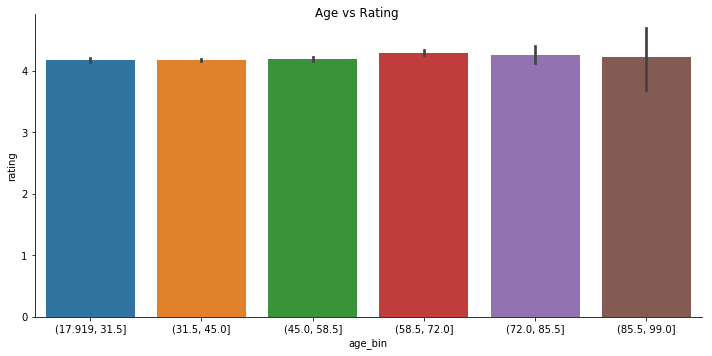

In [63]:
f = sns.catplot(x='age_bin', y='rating',data = df, kind='bar', aspect =2 )
f.fig.suptitle("Age vs Rating")
#plt.savefig('positivefeedback-age.png', format='png', dpi=300)
plt.show()

###### Which age group is preferring which departments(dept_name)

In [73]:
df['age_group'] = pd.qcut(df.age, 12)

In [76]:
series_age_dept = df.groupby(['dept_name','age_group']).size()
series_age_dept

dept_name  age_group     
Bottoms    (17.999, 27.0]     290
           (27.0, 32.0]       407
           (32.0, 34.0]       248
           (34.0, 37.0]       392
           (37.0, 39.0]       349
           (39.0, 41.0]       256
           (41.0, 44.0]       306
           (44.0, 48.0]       431
           (48.0, 52.0]       263
           (52.0, 56.0]       276
           (56.0, 62.0]       325
           (62.0, 99.0]       256
Dresses    (17.999, 27.0]     584
           (27.0, 32.0]       786
           (32.0, 34.0]       427
           (34.0, 37.0]       693
           (37.0, 39.0]       624
           (39.0, 41.0]       351
           (41.0, 44.0]       500
           (44.0, 48.0]       626
           (48.0, 52.0]       444
           (52.0, 56.0]       441
           (56.0, 62.0]       447
           (62.0, 99.0]       396
Intimate   (17.999, 27.0]     194
           (27.0, 32.0]       240
           (32.0, 34.0]       129
           (34.0, 37.0]       226
           (37.0, 39.0

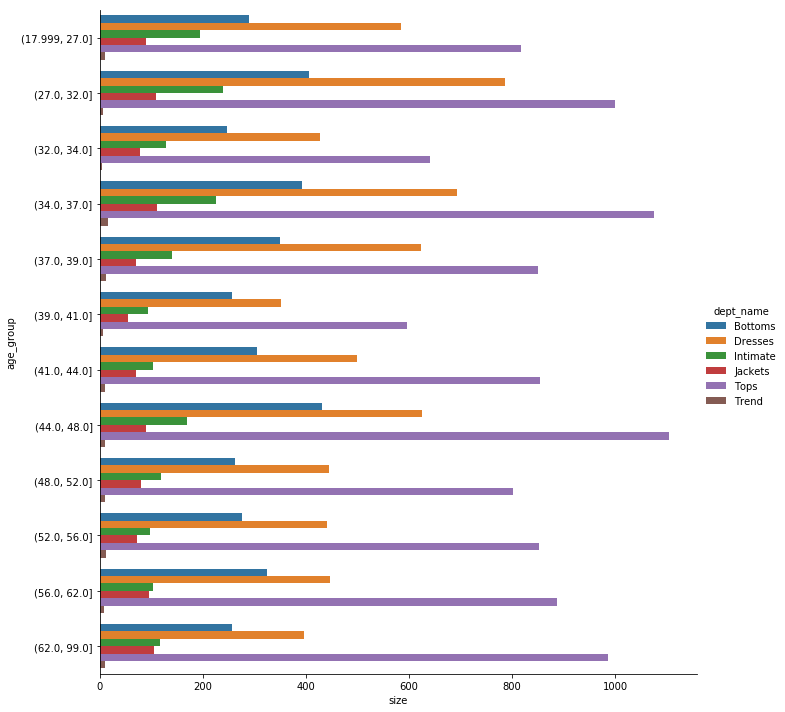

In [77]:
age_dept = pd.DataFrame(series_age_dept).reset_index().rename(columns={0:'size'})
sns.catplot(data=age_dept, x='size', y='age_group', hue ='dept_name' ,kind = 'bar', height = 10)

###### Distribution of Age Range To The Total Recommendations

In [79]:
series_age_recommended = df.groupby('age_group')['recommended_IND'].sum().copy()
series_age_recommended

age_group
(17.999, 27.0]    1669
(27.0, 32.0]      2019
(32.0, 34.0]      1222
(34.0, 37.0]      2022
(37.0, 39.0]      1722
(39.0, 41.0]      1117
(41.0, 44.0]      1485
(44.0, 48.0]      1960
(48.0, 52.0]      1437
(52.0, 56.0]      1463
(56.0, 62.0]      1596
(62.0, 99.0]      1588
Name: recommended_IND, dtype: int64

In [80]:
newdata = pd.DataFrame(series_age_recommended).reset_index()
newdata

,age_group,recommended_IND
0,"(17.999, 27.0]",1669
1,"(27.0, 32.0]",2019
2,"(32.0, 34.0]",1222
3,"(34.0, 37.0]",2022
4,"(37.0, 39.0]",1722
5,"(39.0, 41.0]",1117
6,"(41.0, 44.0]",1485
7,"(44.0, 48.0]",1960
8,"(48.0, 52.0]",1437
9,"(52.0, 56.0]",1463


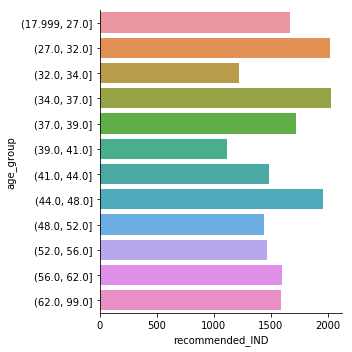

In [81]:
sns.catplot(data=newdata, x='recommended_IND', y='age_group', kind = 'bar')

##### Sentiment Analysis

In [28]:
negative=open("sad.txt",'r', encoding = "ISO-8859-1")
negativ=negative.read().lower().split()

positive=open("happy.txt",'r', encoding = "ISO-8859-1")
positiv=positive.read().lower().split()

In [29]:
#used for tagging the sentiment

def giveSentiment(reviews):

    review= clean(reviews)
    score=0 # keeping the score value
    total_words=0 # tatal words analyzed
    positive=0 # total positive word 
    negative =0 # total negative word 
    count=0
    flag=0.5
    for x in review:
        
        if x in negativ:# words with negative effect are scored -1
            
            score-=1
            total_words+=1
            negative+=1
            flag=0 #flag captures the recent sentiment 
        
        elif x in positiv:# words with positive effect are scored +1
            
            score+=1
            total_words+=1
            positive+=1
            flag=1
    
        elif x=="!": # this block of code calculates the effect of !

            count+=1
            i=review.index(x)
            if review[i-1] in negativ:
                #print("!-")
                score-=1
                total_words+=1
            elif review[i-1] in positiv:
                #print("!+")
                score+=1
                total_words+=1
            else:
                pass
        
        
        elif x=="?": # this block of code calculates the effect of ?
            count+=1
            if flag==0:
                score-=1
                total_words+=1
            elif flag==1:
                total_words+=1
                score+=1
            else:
                pass

        
        elif x=="so" or x=="too" or x=="very":# this block of code calculates the effect of  "so","too","very"
            count+=1
            i=review.index(x)
            if (review.index(x)== len(review))|(review[review.index(x)]== review[-1]):
                break
            elif review[i+1] in negativ:

                score-=1
                total_words+=1
            elif review[i+1] in positiv:
  
                score+=1
                total_words+=1
            else:
                pass
     
        elif x=="not" :# this block of code calculates the effect of "not", the approach used is that the upcoming effect is reversed
            #print("#")
            count+=1
            i=review.index(x)

            if (review.index(x)== len(review))|(review[review.index(x)]== review[-1]):
                break
            elif review[i+1] in negativ:
                score+=3 #a score of 3 is added because the effect of the upcoming word has reversed,it consists two scores 1:for the supportive word itself 2:for the upcoming sentiment
                total_words+=1
            elif review[i+1] in positiv:
                score-=3 #score of -3 is added because the effect of the upcoming word has reversed,it consists two scores -1:for the supportive word itself -2:for the upcoming sentiment
                total_words+=1
            else:
                pass   
    
    final = score/len(review)
    
    if final <0:
        return -1
    elif final==0:
        return 0
    else:
        return 1

In [30]:
def clean(n):
    m = re.sub(r"[^a-zA-Z!?]", " ",str(n).lower())
    m = m.replace(" be ", " ").replace(" on ", " ").replace(" to ", " ").replace(" is ", " ").\
        replace(" are ", " ").replace(" was ", " ").replace(" were ", " ").replace(' a '," ").replace(' an '," ").\
        replace(" the "," ").split()
    return(m)

Calculating the sentiment score for each Review

In [31]:
df["Sentiment_score"]=df['review_text'].apply(giveSentiment)

In [94]:
df["Sentiment_score"][df.review_text.isna()] = 99

In [95]:
def define_sentiment(i):
    if (i == 1):
        return 'Positive' 
    elif (i == 0): 
        return 'Neutral' 
    elif (i == -1):
        return 'Negative'

In [96]:
df['Sentiment_label'] = df.Sentiment_score.apply(define_sentiment)

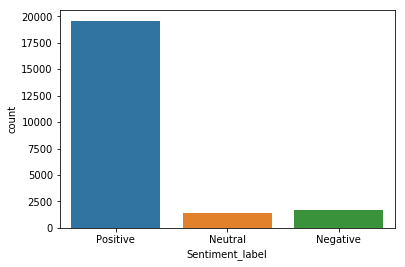

In [97]:
sns.countplot(df.Sentiment_label)

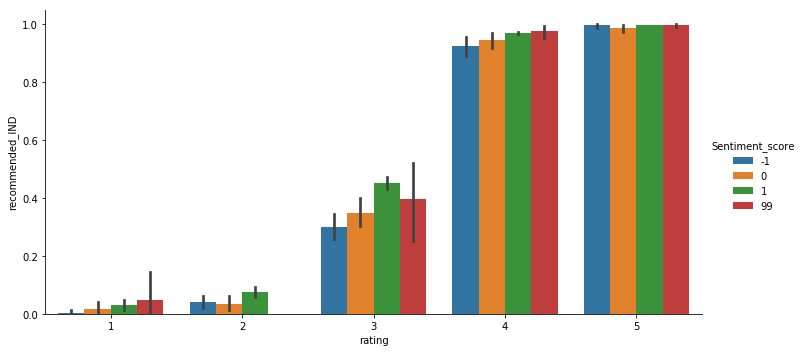

In [98]:
sns.catplot(data=df,x='rating',y='recommended_IND', hue = 'Sentiment_score',
           kind='bar',aspect=2)

Why is recommendations important?

In [99]:
df.groupby('clothing_ID').recommended_IND.agg(['size','sum']).rename(columns={\
    'size':'times_purchased','sum':'Number_of_times_recommended'}).sort_values('times_purchased',ascending = False).head(20)

,times_purchased,Number_of_times_recommended
clothing_ID,,
1078,1024,841
862,806,661
1094,756,621
1081,582,494
872,545,478
829,527,436
1110,480,403
868,430,325
895,404,341


Predicting if any item will be recommended

In [109]:
df3 = pd.get_dummies(df,columns=['clothing_ID','class_name','dept_name','division_name'])
X = df3.drop(columns=['recommended_IND','review_text' , 'rating','Sentiment_label','age_group','age_bin'])
Y=df3.recommended_IND

In [108]:
dt = tree.DecisionTreeClassifier(max_depth = 3)
dt.fit(X,Y)
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.str) 
tree.export_graphviz(
    dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  

In [111]:
os.environ["PATH"] += os.pathsep + 'F:/soft/Graphviz/release/bin/'

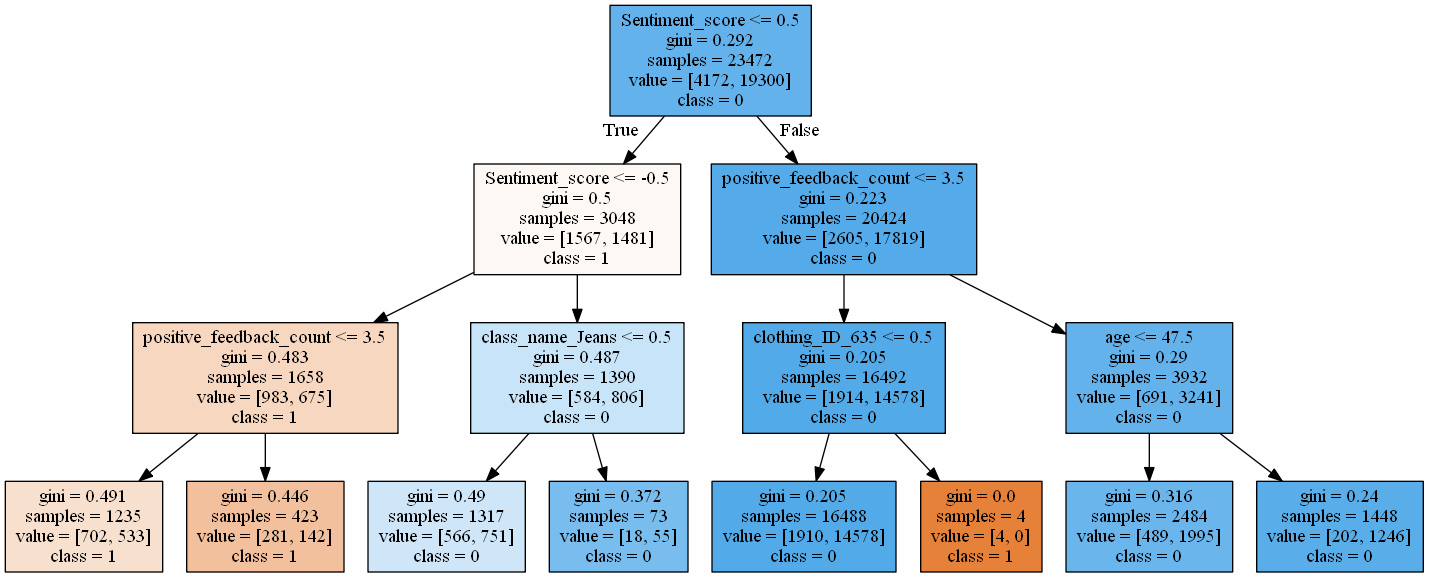

In [112]:
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

In [113]:
from sklearn.model_selection import KFold

In [114]:
nfolds = 10

In [115]:
kf = KFold(n_splits=nfolds,random_state=0,shuffle=True)

In [120]:
avgCV_AUC = sk.model_selection.cross_val_score(dt,X,Y,cv=kf,n_jobs=-1,\
                                                    scoring='roc_auc').mean()
avgCV_AUC

0.6761411918147336

In [118]:
X2 = df3.drop(columns=['recommended_IND','review_text' , 'Sentiment_label','age_group','age_bin'])
Y2=df3.recommended_IND

In [123]:
dt = tree.DecisionTreeClassifier(max_depth = 3)
dt.fit(X2,Y2)
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X2.columns)
dt_target_names = np.array(Y2.unique(),dtype=np.str) 
tree.export_graphviz(
    dt, out_file='tree1.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  


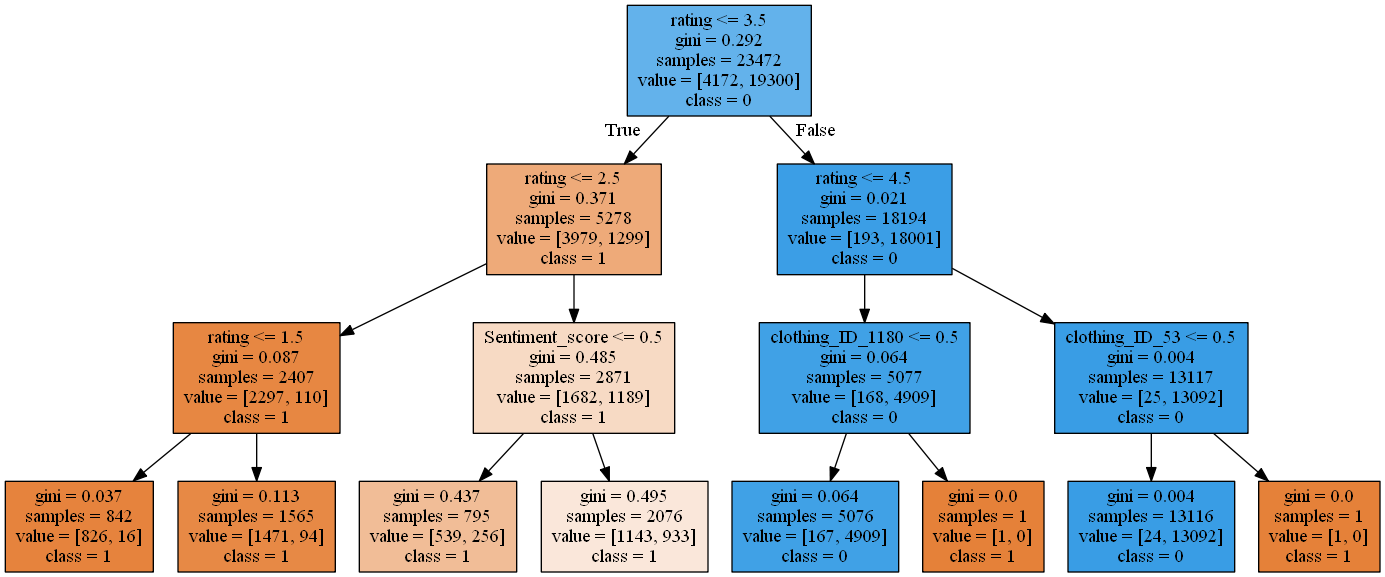

In [125]:
graph = pydotplus.graph_from_dot_file('tree1.dot')
Image(graph.create_png())

In [121]:
avgCV_AUC = sk.model_selection.cross_val_score(dt,X2,Y2,cv=kf,n_jobs=-1,\
                                                    scoring='roc_auc').mean()
avgCV_AUC

0.9731854465615382

Beacuse of high corelation between rating and recommended index Decision tree is baised